In [21]:
import joblib
import numpy as np
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt
import seaborn as sns

In [12]:
(X_train, y_train) = joblib.load('../data/training_crime_data.joblib')
(X_test, y_test) = joblib.load('../data/training_crime_data2.joblib')

In [13]:
X_train

,domestic,beat,district,ward,community_area,year,latitude,longitude,time,day_of_week_Monday,...,season_Spring,season_Summer,season_Winter,loc_grouped_GOVERNMENT,loc_grouped_OTHER,loc_grouped_PUBLIC_AREA,loc_grouped_PUBLIC_BUILDING,loc_grouped_PUBLIC_TRANSPORTATION,loc_grouped_RESIDENCE,loc_grouped_VEHICLE
465938,0,121.0,1.0,42.0,28.0,2021.0,41.881828,-87.643546,15,False,...,False,False,False,False,False,False,False,False,True,False
607645,0,1935.0,19.0,43.0,7.0,2022.0,41.930906,-87.644017,14,False,...,True,False,False,False,False,False,False,False,False,False
321293,0,1933.0,19.0,44.0,6.0,2021.0,41.939918,-87.653289,1,False,...,False,False,True,False,False,False,False,True,False,False
316176,0,1632.0,16.0,38.0,17.0,2021.0,41.942696,-87.792211,17,False,...,False,False,True,False,False,False,False,False,True,False
227451,0,823.0,8.0,15.0,66.0,2005.0,41.778837,-87.711469,15,False,...,False,False,False,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110268,0,1511.0,15.0,29.0,25.0,2021.0,41.899292,-87.775273,22,True,...,True,False,False,False,False,False,False,False,True,False
259178,0,1812.0,18.0,43.0,7.0,2021.0,41.92316,-87.641407,9,True,...,False,False,True,False,False,False,False,False,True,False
365838,1,1723.0,17.0,35.0,14.0,2022.0,41.961638,-87.726623,13,True,...,False,False,True,False,False,False,False,False,True,False
131932,1,1512.0,15.0,29.0,25.0,2023.0,41.882631,-87.771871,15,True,...,False,False,False,False,False,False,False,False,False,True


In [14]:
class GaussianNaiveBayes:
    def fit(self, X, y):
        self.classes = np.unique(y)
        self.mean = {}
        self.var = {}
        self.prior = {}

        for cls in self.classes:
            X_cls = X[y == cls]
            self.mean[cls] = np.mean(X_cls, axis=0)
            self.var[cls] = np.var(X_cls, axis=0)
            self.prior[cls] = len(X_cls) / len(X)

    def _pdf(self, x, mean, var):
        exponent = np.exp(-(x - mean)**2 / (2 * var))
        return (1 / np.sqrt(2 * np.pi * var)) * exponent

    def predict_proba(self, X):
        likelihood = np.zeros((X.shape[0], len(self.classes)))

        for i, cls in enumerate(self.classes):
            prior = np.log(self.prior[cls])
            pdf = np.sum(np.log(self._pdf(X, self.mean[cls], self.var[cls])), axis=1)
            likelihood[:, i] = prior + pdf

        # Normalize to get probabilities
        exp_likelihood = np.exp(likelihood)
        probabilities = exp_likelihood / np.sum(exp_likelihood, axis=1, keepdims=True)

        return probabilities

    def predict(self, X):
        probabilities = self.predict_proba(X)
        return np.argmax(probabilities, axis=1)

In [15]:
model = GaussianNaiveBayes()
model.fit(X_train, y_train)

# Assuming X_test is your test data
predictions = model.predict(X_test)

In [16]:
accuracy = metrics.accuracy_score(y_true=y_test, y_pred=predictions)
precision = metrics.precision_score(y_true=y_test, y_pred=predictions, average='weighted')
recall = metrics.recall_score(y_true=y_test, y_pred=predictions, average='weighted')
f1 = metrics.f1_score(y_true=y_test, y_pred=predictions, average='weighted')

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

Accuracy: 0.87
Precision: 0.86
Recall: 0.87
F1 Score: 0.86


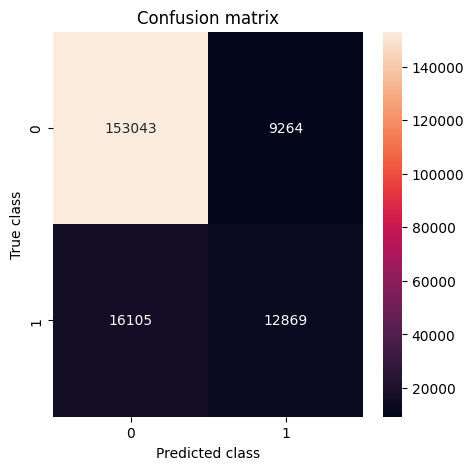

In [22]:
cm = confusion_matrix(y_test, predictions)
plt.figure(figsize=(5, 5))
sns.heatmap(cm, annot=True,fmt='d')
plt.xlabel('Predicted class')
plt.ylabel('True class')
plt.title('Confusion matrix')
plt.show()

In [28]:
from sklearn.metrics import accuracy_score

In [26]:
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

train_accuracy = accuracy_score(y_train, train_predictions)
test_accuracy = accuracy_score(y_test, test_predictions)

print(f"Train Accuracy: {train_accuracy}")
print(f"Test Accuracy: {test_accuracy}")

/home/abhinav-linux/Github/Urban-Crime-Prediction-using-Bayesian-Model/venv/lib/python3.10/site-packages/pandas/core/arrays/masked.py:644: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs2, **kwargs)
/home/abhinav-linux/Github/Urban-Crime-Prediction-using-Bayesian-Model/venv/lib/python3.10/site-packages/pandas/core/internals/blocks.py:366: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)
/home/abhinav-linux/Github/Urban-Crime-Prediction-using-Bayesian-Model/venv/lib/python3.10/site-packages/pandas/core/arrays/masked.py:644: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs2, **kwargs)
/home/abhinav-linux/Github/Urban-Crime-Prediction-using-Bayesian-Model/venv/lib/python3.10/site-packages/pandas/core/internals/blocks.py:366: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)
/tmp/ipykernel_129780/1987006925.py:28: RuntimeWarni

Train Accuracy: 0.8682268327657287
Test Accuracy: 0.8673731316753885


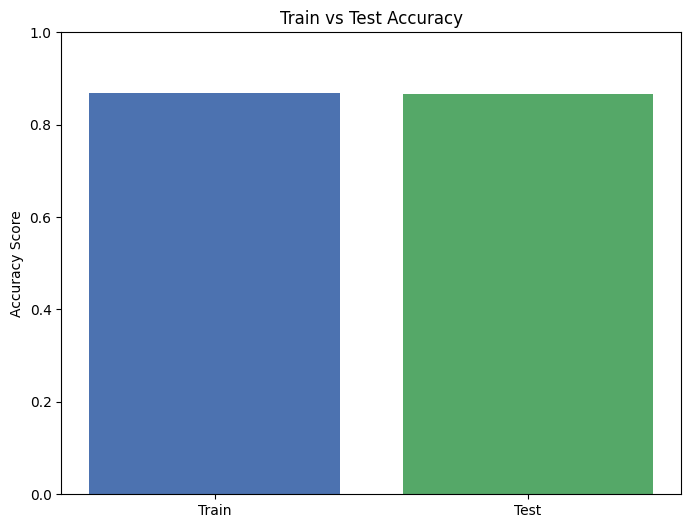

In [27]:
plt.figure(figsize=(8, 6))

plt.bar(['Train', 'Test'], [train_accuracy, test_accuracy], color=['#4c72b0', '#55a868'])
plt.ylabel('Accuracy Score')
plt.title('Train vs Test Accuracy')
plt.ylim([0, 1]);
